## Read Data

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, mannwhitneyu, kruskal, shapiro

In [178]:
data = pd.read_excel(
    'Nutrition BMINDS Food Insecurity Survey and stress (Responses)_before_u[pdate.xlsx'
)




In [179]:
data.head()

,Timestamp,What is your gender?,What is your age?,Are you currently enrolled in college?,What region do you live in ?,How many hours do you work in an average week during the school year?,Which of these describes your personal income last year?,What is the total income of your primary household?,Are you or your family eligible for SNAP benefits or any governmental assistance program?,What is the highest level of education you have completed?,...,"On an average week, how many times do you consume nuts, including flaxseed?","On an average week, how many times do you consume rice and/or pasta?","On an average week, how many times do you consume red meat, chicken, or turkey?","On an average week, how many times do you consume dark green leafy vegetables?(e.g., spinach, kale, lettuce …etc.)","On an average week, how many times do you consume beans?(e.g. black beans, black-eyed peas, lentils, lima beans, soy nuts …etc.)","On an average week, how many times do you consume fish and/or shellfish (including sardines and tuna)?","On an average week, how many times do you consume fast foods and/or pre-made or packaged food?","On average week, how many times do you take multivitamin supplements?","On average week, how many times do you take fish oil supplements?",Email Address
0,2022-09-05 13:33:54.552,Male,18-22,Yes,North America/Central America,Not applicable,0,"$90,000 to $99,999",Not sure,High School,...,Never,3 times,5 times or more,5 times or more,Never,2 times,2 times,Never,Never,NaN
1,2022-09-05 14:24:32.823,Female,50 and older,No,North America/Central America,Not applicable,"$100,000 or greater","$100,000 to $149,999",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,3 times,5 times or more,3 times,4 times,4 times,2 times,1 time,5 times or more,5 times or more,NaN
2,2022-09-05 14:57:44.437,Male,50 and older,No,North America/Central America,More than 40 hours,"$100,000 or greater","$250,000 or more",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,1 time,3 times,5 times or more,3 times,1 time,1 time,1 time,Never,Never,NaN
3,2022-09-05 18:26:04.941,Female,22-29,No,North America/Central America,11-20 hours,"$1 to $4,999","$30,000 to $39,999",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,1 time,5 times or more,4 times,4 times,1 time,4 times,4 times,Never,Never,NaN
4,2022-09-07 21:04:54.095,Female,50 and older,No,North America/Central America,21 to 30 hours,"30,000 to 49,999","$250,000 or more",No,"2 or 4 Years of College Degree (AA, BA, BS)",...,5 times or more,3 times,4 times,3 times,3 times,1 time,Never,Never,Never,NaN


In [180]:
#Rename The columns

# Standardize column names by stripping whitespace
data.columns = data.columns.str.strip()

rename_dict = {
      # ======================
    # Metadata & Demographics
    # ======================
    'Timestamp': 'timestamp',
    'What is your gender?': 'gender',
    'What is your age?': 'age',
    'Are you currently enrolled in college?': 'enrolled_college',
    'What region do you live in ?': 'region',
    'How many hours do you work in an average week during the school year?': 'work_hours_week',
    'Which of these describes your personal income last year?': 'personal_income',
    'What is the total income of your primary household?': 'household_income',
    'Are you or your family eligible for SNAP benefits or any governmental assistance program? ': 'gov_assistance',
    'What is the highest level of education you have completed?': 'education_level',
    'What is your cumulative GPA range?': 'gpa_range',
    'How many times per week, on average, do you engage in physical activity for at least 20 minutes a day?': 'physical_activity_freq',
    'What is your typical dietary style?': 'dietary_style',
    'How many times a day, on average, do you think about food (ex. eating food, buying food, your next meal)?': 'food_thoughts_daily',

    # ======================
    # Nutrition & Lifestyle
    # ======================
    'During the past 7 days, how many days did you exercise for at least 20 minutes?': 'exercise_days_week',
    'In the past 7 days, how many times did you eat breakfast?': 'breakfast_freq',
    'On an average week, how many times do you consume whole grain products? (e.g., whole grain bread, whole grain cereal, brown rice or whole wheat pasta': 'whole_grains_freq',
    'On an average week, how many times do you consume dairy products?(e.g., milk, cheese, yogurt …etc.)': 'dairy_freq',
    'On an average week, how many times do you consume coffee or other sources of caffeine?(e.g., soda, tea, chocolate, energy drink …etc.)': 'caffeine_freq',
    'On an average week, how many times do you consume fruits?': 'fruits_freq',
    'On an average week, how many times do you consume nuts, including flaxseed?': 'nuts_freq',
    'On an average week, how many times do you consume rice and/or pasta?': 'rice_pasta_freq',
    'On an average week, how many times do you consume red meat, chicken, or turkey?': 'meat_freq',
    'On an average week, how many times do you consume dark green leafy vegetables?(e.g., spinach, kale, lettuce …etc.)': 'leafy_veg_freq',
    'On an average week, how many times do you consume beans?(e.g. black beans, black-eyed peas, lentils, lima beans, soy nuts …etc.)': 'beans_freq',
    'On an average week, how many times do you consume fish and/or shellfish (including sardines and tuna)?': 'fish_freq',
    'On an average week, how many times do you consume fast foods and/or pre-made or packaged food?': 'fast_food_freq',
    'On average week, how many times do you take multivitamin supplements?': 'multivitamin_freq',
    'On average week, how many times do you take fish oil supplements?': 'fish_oil_freq',

    # ======================
    # Email
    # ======================
    'Email Address': 'email',



    # FIES
    "During the last 12 months, was there a time when, because of lack of money or other resources you were worried you would not have enough food to eat?": "fies_q1",
    "During the last 12 months, was there a time when, because of lack of money or other resources you were unable to eat healthy and nutritious food?": "fies_q2",
    "During the last 12 months, was there a time when, because of lack of money or other resources you ate only a few kinds of foods?": "fies_q3",
    "During the last 12 months, was there a time when, because of lack of money or other resources you had to skip a meal?": "fies_q4",
    "During the last 12 months, was there a time when, because of lack of money or other resources you ate less than you thought you should?": "fies_q5",
    "During the last 12 months, was there a time when, because of lack of money or other resources your household ran out of food?": "fies_q6",
    "During the last 12 months, was there a time when, because of lack of money or other resources you were hungry but did not eat?": "fies_q7",
    "During the last 12 months, was there a time when, because of lack of money or other resources you went without eating for a whole day?": "fies_q8",

    # Resilience
    "1. I tend to bounce back quickly after hard times": "rs_q1",
    "2. I have a hard time making it through stressful events": "rs_q2",
    "3. It does not take me long to recover from a stressful event.": "rs_q3",
    "4. It is hard for me to snap back when something bad happens.": "rs_q4",
    "5. I usually come through difficult times with little trouble.": "rs_q5",
    "6. I tend to take a long time to get over set-backs in my life.": "rs_q6",

    # Stress mindset SMM (Corrected for trailing tabs)
    "The effects of stress are negative and should be avoided.": "smm_q1",
    "Experiencing stress facilitates my learning and growth.": "smm_q2",
    "Experiencing stress depletes my health and vitality.": "smm_q3",
    "Experiencing stress enhances my performance and productivity.": "smm_q4",
    "Experiencing stress inhibits my learning and growth.": "smm_q5",
    "Experiencing stress improves my health and vitality.": "smm_q6",
    "Experiencing stress debilitates my performance and productivity.": "smm_q7",
    "The effects of stress are positive and should be utilized.": "smm_q8",


    # K10
    "About how often during the past 30 days did you feel nervous - would you say all of the time, most of the time, some of the time, a little of the time, or none of the time?": "k10_q1",
    "During the past 30 days, about how often did you feel hopeless - all of the time, most of the time, some of the time, a little of the time, or none of the time?": "k10_q2",
    "During the past 30 days, about how often did you feel restless or fidgety?": "k10_q3",
    "How often did you feel so depressed that nothing could cheer you up?": "k10_q4",
    "During the past 30 days, about how often did you feel that everything was an effort?": "k10_q5",
    "During the past 30 days, about how often did you feel worthless?": "k10_q6",


    # PSS-10
    'In the last month, how often have you been upset because of something that happened unexpectedly?': 'pss_q1',
    'In the last month, how often have you felt that you were unable to control the important things in your life?': 'pss_q2',
    'In the last month, how often have you felt nervous and stressed?': 'pss_q3',
    'In the last month, how often have you felt confident about your ability to handle your personal problems?': 'pss_q4',
    'In the last month, how often have you felt that things were going your way?': 'pss_q5',
    'In the last month, how often have you found that you could not cope with all the things that you had to do?': 'pss_q6',
    'In the last month, how often have you been able to control irritations in your life?': 'pss_q7',
    'In the last month, how often have you felt that you were on top of things?': 'pss_q8',
    'In the last month, how often have you been angered because of things that happened that were outside of your control?': 'pss_q9',
    'In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?': 'pss_q10'
}

data = data.rename(columns=rename_dict)

In [181]:
data.columns

Index(['timestamp', 'gender', 'age', 'enrolled_college', 'region',
       'work_hours_week', 'personal_income', 'household_income',
       'Are you or your family eligible for SNAP benefits or any governmental assistance program?',
       'education_level', 'gpa_range', 'physical_activity_freq',
       'dietary_style', 'food_thoughts_daily', 'fies_q1', 'fies_q2', 'fies_q3',
       'fies_q4', 'fies_q5', 'fies_q6', 'fies_q7', 'fies_q8', 'rs_q1', 'rs_q2',
       'rs_q3', 'rs_q4', 'rs_q5', 'rs_q6',
       '1. Because with only a high-school degree I would not find a high-paying job later on.',
       '2. Because I experience pleasure and satisfaction while learning new things.',
       '3. Because I think that a college education will help me better prepare for the career I have chosen.',
       '4. For the intense feelings I experience when I am communicating my own ideas to others.',
       '5. Honestly, I don't know; I really feel that I am wasting my time in school.',
       '6. For th

In [182]:
#Drop un important columns
acadmot_cols = [
    col for col in data.columns
    if col.strip().startswith(tuple([f"{i}." for i in range(1, 29)]))
]

data = data.drop(columns=acadmot_cols)


# **Handling missing values**

In [183]:
data.isna().sum()

,0
timestamp,0
gender,0
age,1
enrolled_college,1
region,0
...,...
fish_freq,15
fast_food_freq,17
multivitamin_freq,16
fish_oil_freq,23


In [184]:
#drop email col
data = data.drop(columns=['email'], errors='ignore')
#fill the null values in age with unknown
data['age'] = data['age'].fillna('Unknown')
#mapping
freq_map = {
    'Never': 0,
    '0 times': 0,
    '1 time': 1,
    '1 times': 1,
    '2 times': 2,
    '3 times': 3,
    '4 times': 4,
    '5 times': 5,
    '6 times': 6,
    '7 times': 7
}

data['enrolled_college'] = data['enrolled_college'].fillna('Unknown')
nutrition_cols = [
    'fish_freq',
    'fast_food_freq',
    'multivitamin_freq',
    'fish_oil_freq'
]

for col in nutrition_cols:
    data[col] = data[col].map(freq_map)
    data[col] = data[col].fillna(data[col].median())

mode_value = data['beans_freq'].mode()[0]
data['beans_freq'] = data['beans_freq'].fillna(mode_value)



In [185]:
data.isna().sum()

,0
timestamp,0
gender,0
age,0
enrolled_college,0
region,0
...,...
beans_freq,0
fish_freq,0
fast_food_freq,0
multivitamin_freq,0


In [186]:
data.duplicated().sum()


np.int64(69)

In [187]:
data = data.drop_duplicates()

# **Detect outlieres and capping**

In [188]:
def detect_outliers_iqr(df, column):

    s = pd.to_numeric(df[column], errors='coerce')

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(s < lower) | (s > upper)]
    return outliers, lower, upper


In [189]:
cols_to_check = [
    'work_hours_week',
    'exercise_days_week',
    'breakfast_freq',
    'whole_grains_freq',
    'dairy_freq',
    'caffeine_freq',
    'fruits_freq',
    'nuts_freq',
    'rice_pasta_freq',
    'meat_freq',
    'leafy_veg_freq',
    'beans_freq',
    'fish_freq',
    'fast_food_freq',
    'multivitamin_freq',
    'fish_oil_freq'
]
outlier_summary = {}

for col in cols_to_check:
    if col not in data.columns:
        print(f"Column: {col} not found, skipped.")
        print("-" * 40)
        continue

    numeric_series = pd.to_numeric(data[col], errors='coerce')

    if numeric_series.notna().sum() == 0:
        print(f"Column: {col} has no numeric values, skipped.")
        print("-" * 40)
        continue

    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_summary[col] = len(outliers)

    print(f"Column: {col}")
    print(f" • Outliers found: {len(outliers)}")
    print(f" • Lower Bound: {lower}")
    print(f" • Upper Bound: {upper}")
    print("-" * 40)

outlier_summary



Column: work_hours_week has no numeric values, skipped.
----------------------------------------
Column: exercise_days_week has no numeric values, skipped.
----------------------------------------
Column: breakfast_freq has no numeric values, skipped.
----------------------------------------
Column: whole_grains_freq has no numeric values, skipped.
----------------------------------------
Column: dairy_freq has no numeric values, skipped.
----------------------------------------
Column: caffeine_freq has no numeric values, skipped.
----------------------------------------
Column: fruits_freq has no numeric values, skipped.
----------------------------------------
Column: nuts_freq has no numeric values, skipped.
----------------------------------------
Column: rice_pasta_freq has no numeric values, skipped.
----------------------------------------
Column: meat_freq has no numeric values, skipped.
----------------------------------------
Column: leafy_veg_freq has no numeric values, ski

{'fish_freq': 0,
 'fast_food_freq': 0,
 'multivitamin_freq': 184,
 'fish_oil_freq': 72}

In [190]:
#Capping
def cap_outliers_iqr(df, column):
    s = pd.to_numeric(df[column], errors='coerce')
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = s.clip(lower, upper)
    return lower, upper


In [191]:
for col in cols_to_check:
    if col in data.columns:
        cap_outliers_iqr(data, col)

# **Food Insecurity**

In [192]:
fies_cols = ['fies_q1','fies_q2','fies_q3','fies_q4','fies_q5','fies_q6','fies_q7','fies_q8']

data[fies_cols] = data[fies_cols].apply(lambda col: col.astype(str).str.strip().str.lower())

fies_mapping = {
    "yes": 1,
    "sometimes yes": 1,
    "sometimes": 1,
    "no": 0
}

for c in fies_cols:
    data[c] = data[c].replace(fies_mapping)
    data[c] = pd.to_numeric(data[c], errors='coerce')

data['fies_score'] = data[fies_cols].sum(axis=1)


In [193]:
def categorize_fies(score):
    if score == 0:
        return "High food security"
    elif score == 1:
        return "Marginal food security"
    elif 2 <= score <= 4:
        return "Low food security"
    elif 5 <= score <= 8:
        return "Very low food security"
    else:
        return "Invalid"


data["fies_level"] = data["fies_score"].apply(categorize_fies)


# **Resilience**

In [194]:

#RS (Resilience Scale)
#Reverse items: rs_q2, rs_q4, rs_q6



negative_cols = [
    'rs_q2',
    'rs_q4',
    'rs_q6'
]


for col in negative_cols:
    data[col] = 6 - data[col]

res_cols = [
    'rs_q1',
    'rs_q2',
    'rs_q3',
    'rs_q4',
    'rs_q5',
    'rs_q6'
]

data['resilience_score'] = data[res_cols].sum(axis=1)


In [195]:
def categorize_rs(score):
    if 6 <= score <= 13:
        return "Low resilience"
    elif 14 <= score <= 21:
        return "Normal resilience"
    elif 22 <= score <= 30:
        return "High resilience"
    else:
        return "Invalid"

data["RS_level"] = data["resilience_score"].apply(categorize_rs)


# **SMM**

In [196]:
#SMM
smm_cols = ['smm_q1','smm_q2','smm_q3','smm_q4','smm_q5','smm_q6','smm_q7','smm_q8']


if "smm_score" not in data.columns:

    data[smm_cols] = data[smm_cols].apply(lambda col: col.astype(str).str.strip().str.lower())

    likert_mapping = {
        "strongly disagree": 0,
        "disagree": 1,
        "neither agree nor disagree": 2,
        "agree": 3,
        "strongly agree": 4
    }
    data[smm_cols] = data[smm_cols].replace(likert_mapping)
    data[smm_cols] = data[smm_cols].apply(pd.to_numeric, errors='coerce')


    reverse_items = ['smm_q1','smm_q3','smm_q5','smm_q7']
    for col in reverse_items:
        data[col] = 4 - data[col]


    data[smm_cols] = data[smm_cols].fillna(data[smm_cols].mean())


    data["smm_score"] = data[smm_cols].sum(axis=1)

In [197]:
print("smm_score" in data.columns)
print([c for c in data.columns if "smm" in c.lower()])


True
['smm_q1', 'smm_q2', 'smm_q3', 'smm_q4', 'smm_q5', 'smm_q6', 'smm_q7', 'smm_q8', 'smm_score']


In [198]:

def smm_category(score):
    if 0 <= score <= 10:
        return "Likely to have a debilitating effect"
    elif 11 <= score <= 21:
        return "Likely to have a moderate effect"
    elif 22 <= score <= 32:
        return "Likely to have an enhancing effect"
    else:
        return "Out of range"
data["smm_level"] = data["smm_score"].apply(smm_category)



# **k10 (mental distress)**

(Psychological distress (K6))



In [199]:

# K10


k10_items = [
    'k10_q1',
    'k10_q2',
    'k10_q3',
    'k10_q4',
    'k10_q5',
    'k10_q6'
]

# Mapping responses to numeric values (1–5)
k10_mapping = {
    "none": 1,
    "none of the time": 1,
    "a little": 2,
    "a little of the time": 2,
    "some": 3,
    "some of the time": 3,
    "most": 4,
    "most of the time": 4,
    "all": 5,
    "all of the time": 5
}

for col in k10_items:
    data[col] = (
        data[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace(k10_mapping)
    )
    data[col] = pd.to_numeric(data[col], errors='coerce')

data[k10_items] = data[k10_items].fillna(data[k10_items].mean())

data['k10_score'] = data[k10_items].sum(axis=1)


In [200]:
def k10_interpretation_6item(score):
    if 6 <= score <= 11:
        return "Likely to be well"
    elif 12 <= score <= 17:
        return "Moderate psychological distress"
    elif 18 <= score <= 30:
        return "Severe psychological distress"
    else:
        return "Out of range"

data['k10_level'] = data['k10_score'].apply(k10_interpretation_6item)


In [201]:
score_cols = ['fies_score', 'resilience_score', 'smm_score', 'k10_score']
[c for c in score_cols if c in data.columns]


for col in score_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [202]:
for col in score_cols:
    if col in data.columns:
        print(col, "non-null numeric =", data[col].notna().sum(), "dtype =", data[col].dtype)


fies_score non-null numeric = 1024 dtype = float64
resilience_score non-null numeric = 1024 dtype = float64
smm_score non-null numeric = 1024 dtype = float64
k10_score non-null numeric = 1024 dtype = float64


In [203]:
data = data.rename(columns={
    "k10_score": "k6_score",
    "k10_level": "k6_level"
})

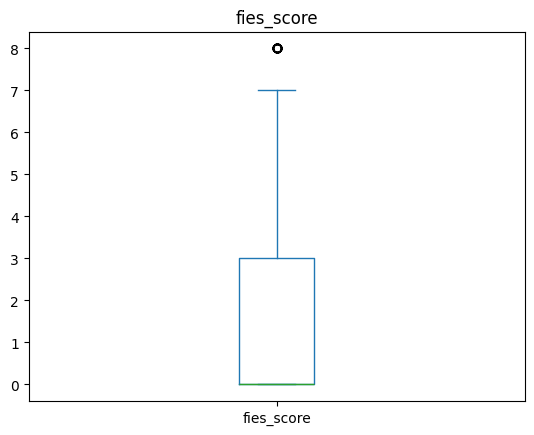

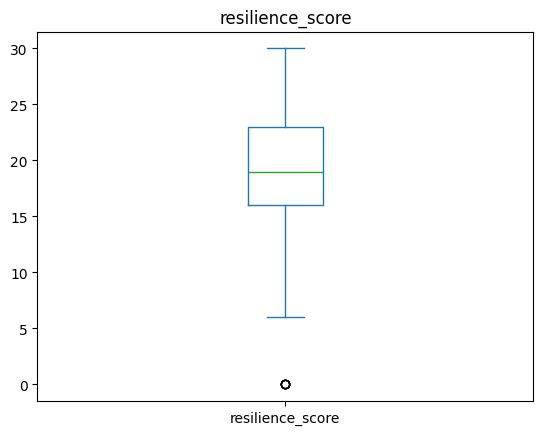

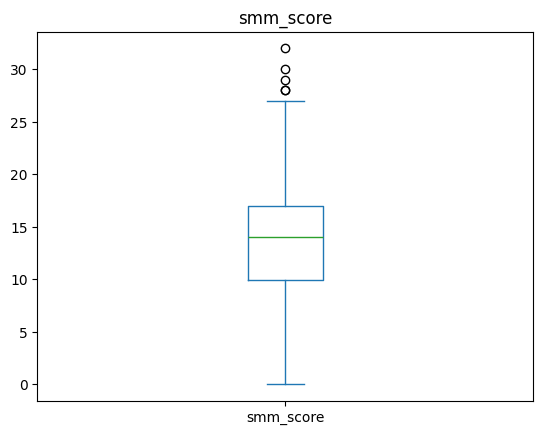

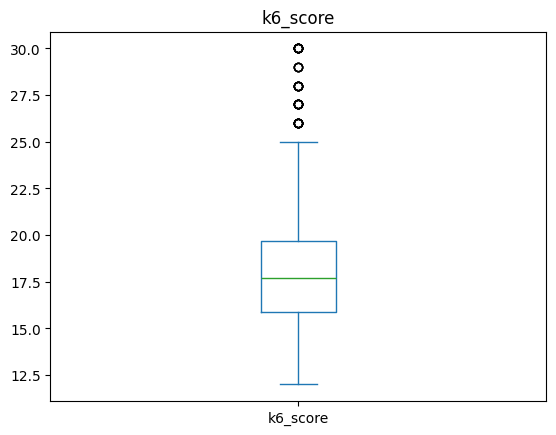

In [204]:
#boxplot (check of existence of outlieres in score cols )

score_cols = [
    'fies_score',
    'resilience_score',
    'smm_score',
    'k6_score'
]

for col in score_cols:
    plt.figure()
    data[col].plot(kind='box', title=col)
    plt.show()


In [205]:
""" Outliers were inspected visually using boxplots.
 Although some extreme values were observed, they were retained as they likely
 represent genuine psychological and food insecurity experiences rather than errors.
 of each scale score.
"""

' Outliers were inspected visually using boxplots.\n Although some extreme values were observed, they were retained as they likely\n represent genuine psychological and food insecurity experiences rather than errors.\n of each scale score.\n'

# **EDA(Exploratory Data Analysis)**

In [206]:
#Data shape
print(data.shape)

(1024, 75)


In [207]:
#Data types
print(data.dtypes)

timestamp           datetime64[ns]
gender                      object
age                         object
enrolled_college            object
region                      object
                         ...      
RS_level                    object
smm_score                  float64
smm_level                   object
k6_score                   float64
k6_level                    object
Length: 75, dtype: object


In [208]:
#NULLS
print(data.isnull().sum())

timestamp           0
gender              0
age                 0
enrolled_college    0
region              0
                   ..
RS_level            0
smm_score           0
smm_level           0
k6_score            0
k6_level            0
Length: 75, dtype: int64


In [209]:
#Simple overview
data.shape
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 1023
Data columns (total 75 columns):
 #   Column                                                                                     Non-Null Count  Dtype         
---  ------                                                                                     --------------  -----         
 0   timestamp                                                                                  1024 non-null   datetime64[ns]
 1   gender                                                                                     1024 non-null   object        
 2   age                                                                                        1024 non-null   object        
 3   enrolled_college                                                                           1024 non-null   object        
 4   region                                                                                     1024 non-null   object        
 5   work

,timestamp,gender,age,enrolled_college,region,work_hours_week,personal_income,household_income,Are you or your family eligible for SNAP benefits or any governmental assistance program?,education_level,...,multivitamin_freq,fish_oil_freq,fies_score,fies_level,resilience_score,RS_level,smm_score,smm_level,k6_score,k6_level
count,1024,1024,1024,1024,1024,0.0,1022,992,1019,1021,...,1024.0,1024.0,1024.000000,1024,1024.000000,1024,1024.000000,1024,1024.000000,1024
unique,NaN,2,7,3,6,NaN,10,13,3,5,...,NaN,NaN,NaN,4,NaN,4,NaN,3,NaN,3
top,NaN,Female,18-22,Yes,North America/Central America,NaN,"$1 to $4,999","$100,000 to $149,999",No,High School,...,NaN,NaN,NaN,High food security,NaN,Normal resilience,NaN,Likely to have a moderate effect,NaN,Moderate psychological distress
freq,NaN,752,697,726,968,NaN,327,205,693,531,...,NaN,NaN,NaN,578,NaN,518,NaN,643,NaN,473
mean,2022-10-04 10:08:15.389872896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.627930,NaN,19.172852,NaN,13.645186,NaN,18.178362,NaN
min,2022-08-03 10:32:57.799000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,NaN,0.000000,NaN,0.000000,NaN,12.000000,NaN
25%,2022-09-13 21:55:01.607249920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,NaN,16.000000,NaN,9.935644,NaN,15.900870,NaN
50%,2022-09-28 02:30:34.212999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,NaN,19.000000,NaN,14.000000,NaN,17.679866,NaN
75%,2022-10-07 19:06:57.081750016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,3.000000,NaN,23.000000,NaN,17.000000,NaN,19.679866,NaN
max,2023-02-16 05:48:45.476000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,8.000000,NaN,30.000000,NaN,32.000000,NaN,30.000000,NaN


In [210]:
"""Some variables contained missing values, which is common in self-reported survey data.
Scale scores were computed using available responses, and no listwise deletion was applied.
"""

'Some variables contained missing values, which is common in self-reported survey data.\nScale scores were computed using available responses, and no listwise deletion was applied.\n'

In [211]:
#describe the score_cols
score_cols = ['fies_score','resilience_score','smm_score','k6_score']
data[score_cols].describe()


,fies_score,resilience_score,smm_score,k6_score
count,1024.000000,1024.000000,1024.000000,1024.000000
mean,1.627930,19.172852,13.645186,18.178362
std,2.375181,5.198918,5.633296,3.220596
min,0.000000,0.000000,0.000000,12.000000
25%,0.000000,16.000000,9.935644,15.900870
50%,0.000000,19.000000,14.000000,17.679866
75%,3.000000,23.000000,17.000000,19.679866
max,8.000000,30.000000,32.000000,30.000000


# **Visuals**

/tmp/ipython-input-3799129851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='pastel')


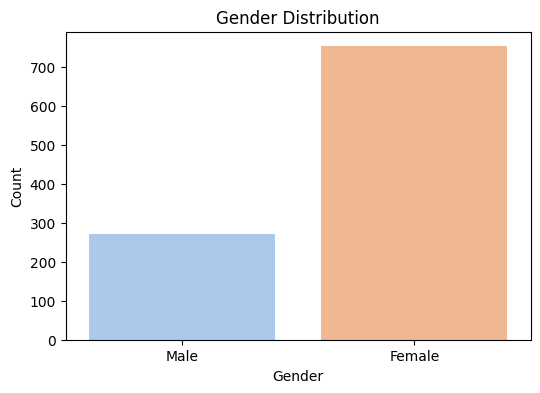

In [212]:
#Gender distribution

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

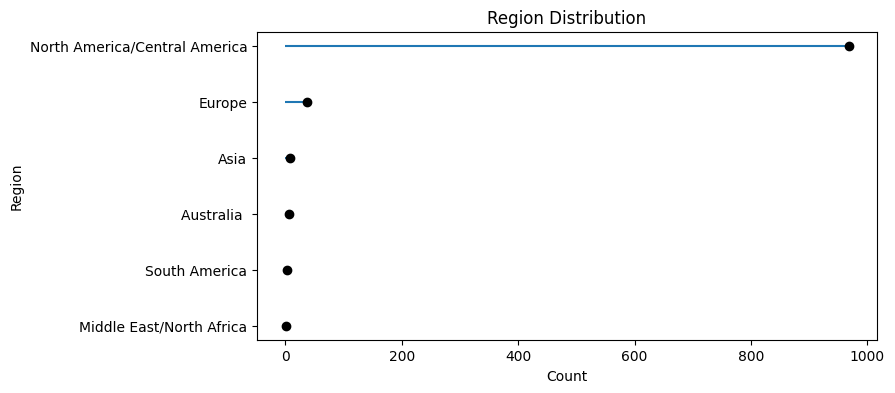

In [213]:
#Region distribution
region_counts = data['region'].value_counts().sort_values()

plt.figure(figsize=(8,4))
plt.hlines(
    y=region_counts.index,
    xmin=0,
    xmax=region_counts.values
)
plt.plot(region_counts.values, region_counts.index, "o",color="black")

plt.title('Region Distribution')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()



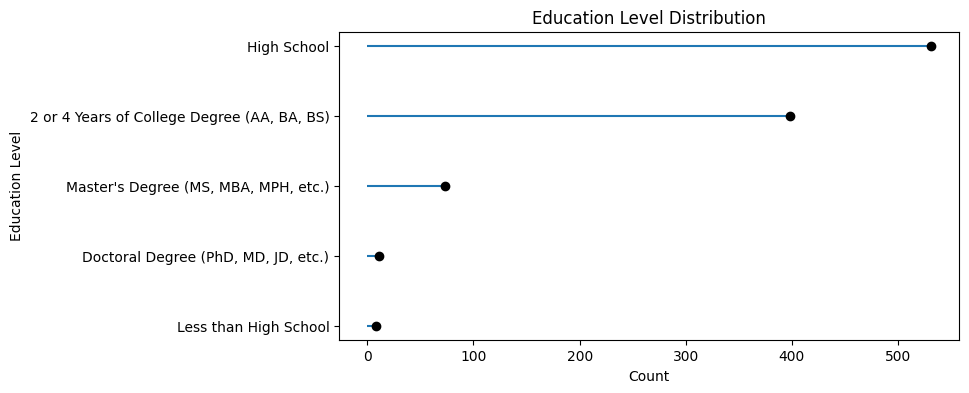

In [214]:
#Education level distribution
edu_counts = data['education_level'].value_counts().sort_values()

plt.figure(figsize=(8,4))
plt.hlines(
    y=edu_counts.index,
    xmin=0,
    xmax=edu_counts.values
)
plt.plot(edu_counts.values, edu_counts.index, "o",color="black")

plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


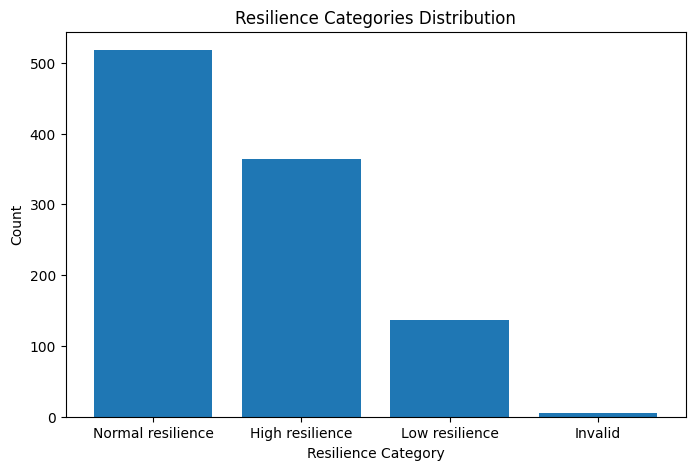

In [215]:
#RS cate_distribution
category_counts = data["RS_level"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Resilience Category")
plt.ylabel("Count")
plt.title("Resilience Categories Distribution")
plt.show()

/tmp/ipython-input-3338135214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fies_level', data=data, palette='Blues')


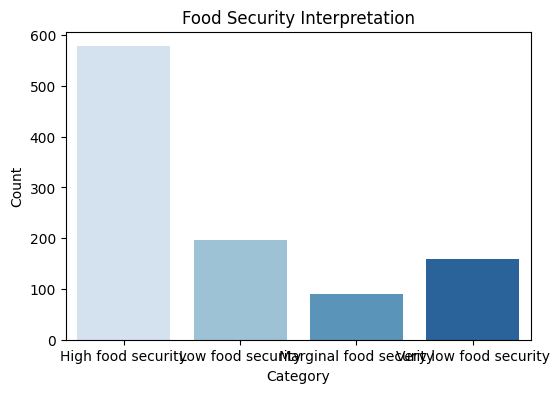

In [216]:
#FIES cate_distribution
plt.figure(figsize=(6,4))
sns.countplot(x='fies_level', data=data, palette='Blues')
plt.title('Food Security Interpretation')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-3411122007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Blues')


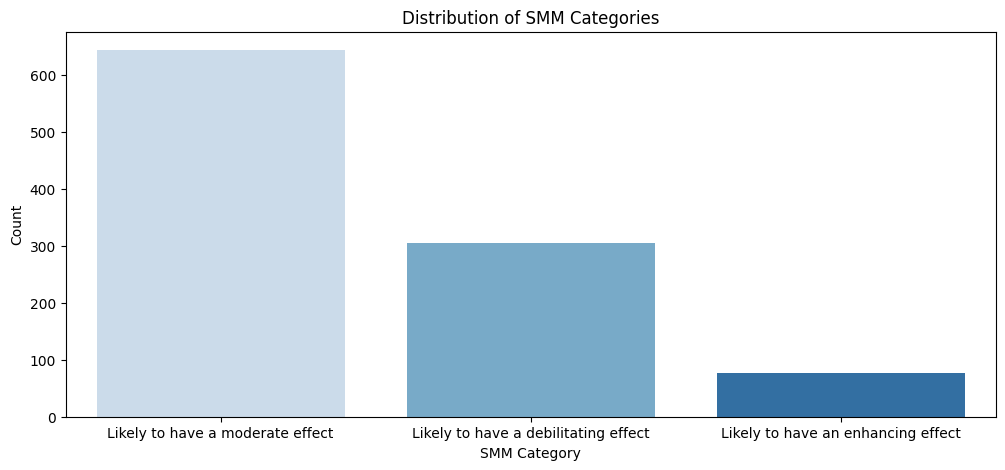

In [217]:
#SMM cate_distribution
category_counts = data["smm_level"].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Blues')
plt.xlabel("SMM Category")
plt.ylabel("Count")
plt.title("Distribution of SMM Categories")

plt.show()

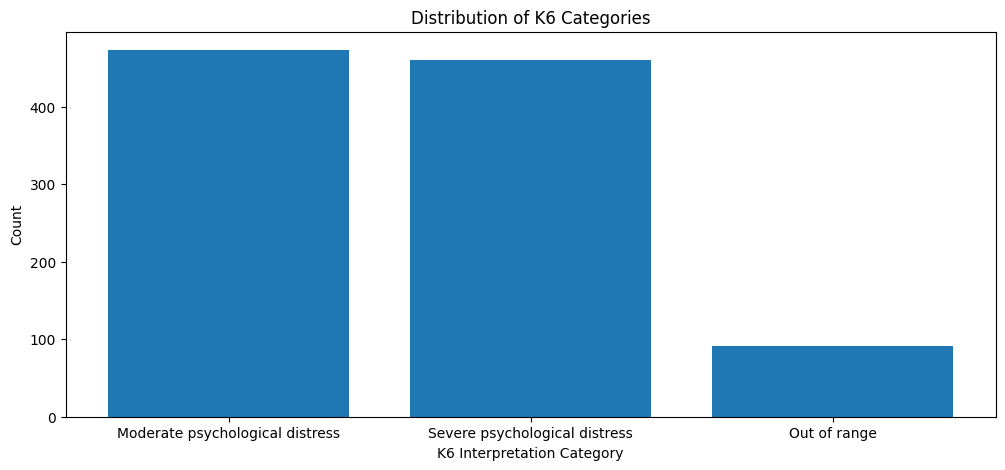

In [218]:
category_counts = data['k6_level'].value_counts()

plt.figure(figsize=(12,5))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("K6 Interpretation Category")
plt.ylabel("Count")
plt.title("Distribution of K6 Categories")

plt.show()

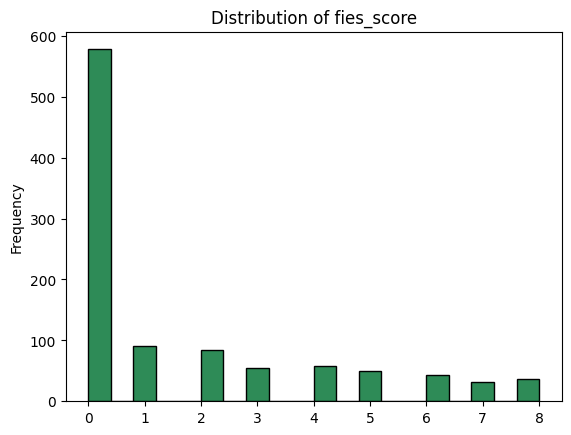

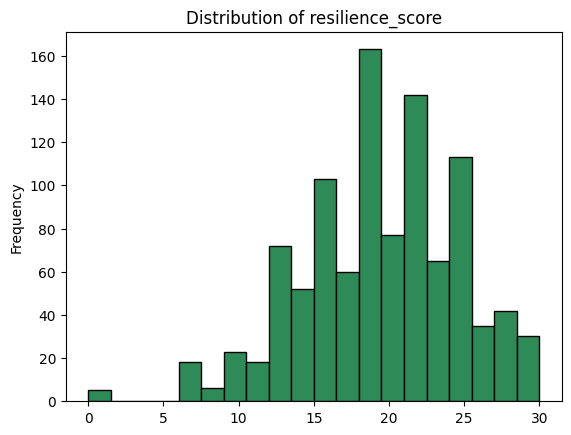

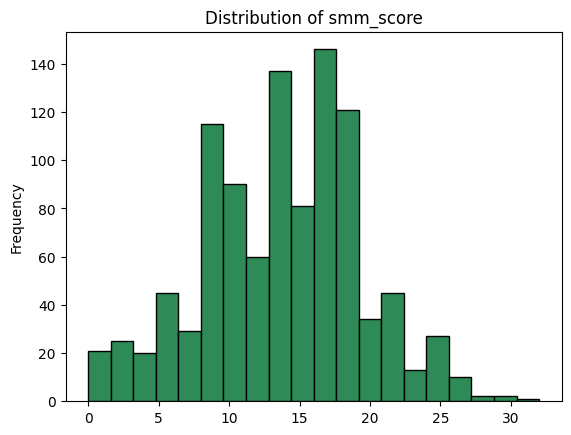

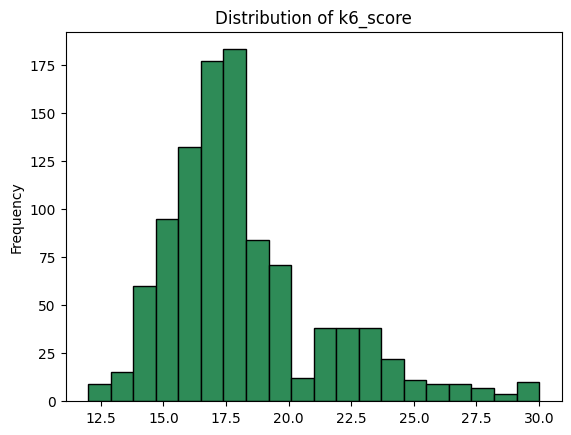

In [219]:
#Histograms(Distribution of  scores)
for col in score_cols:
    plt.figure()
    data[col].dropna().plot(kind='hist', bins=20,color='seagreen', edgecolor='black', title=f'Distribution of {col}')
    plt.show()


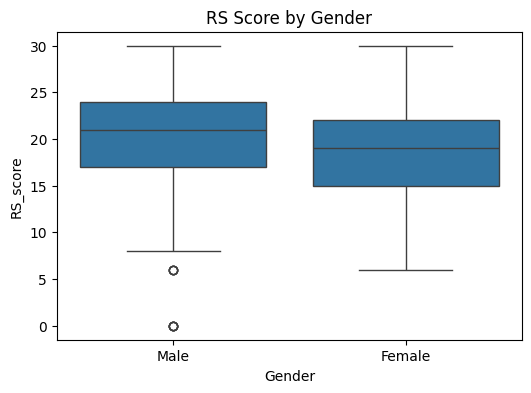

In [220]:
#  Gender × RS

plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='resilience_score', data=data)
plt.title('RS Score by Gender')
plt.xlabel('Gender')
plt.ylabel('RS_score')
plt.show()

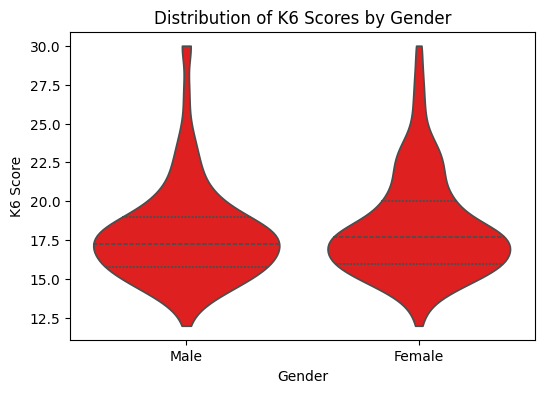

In [221]:
plt.figure(figsize=(6,4))

sns.violinplot(
    x='gender',
    y='k6_score',
    data=data,
    inner='quartile',
    cut=0,
    color="red"
)

plt.title('Distribution of K6 Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('K6 Score')
plt.show()


In [222]:
#Heatmap (Lifestyle × Mental Health)
pivot = pd.crosstab(
    data['exercise_days_week'],
    data['k6_level'],
    normalize='index'
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Exercise Frequency × Psychological Distress')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 600x400 with 0 Axes>

# Check the normality

In [223]:
#Shapiro
from scipy.stats import shapiro

for col in score_cols:
    stat, p = shapiro(data[col].dropna())
    print(f"{col}: W={stat:.3f}, p={p:.5f}")


fies_score: W=0.719, p=0.00000
resilience_score: W=0.985, p=0.00000
smm_score: W=0.992, p=0.00003
k6_score: W=0.909, p=0.00000


# **Correlations**

In [224]:
#top 10 correlations

numeric_df = data.select_dtypes(include='number')


corr = numeric_df.corr(method='spearman')


corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)

corr_pairs.columns = ['Variable 1', 'Variable 2', 'Spearman_rho']

top10_corr = corr_pairs.reindex(
    corr_pairs['Spearman_rho'].abs().sort_values(ascending=False).index
).head(10)

top10_corr


,Variable 1,Variable 2,Spearman_rho
92,fies_q3,fies_score,0.872402
61,fies_q2,fies_score,0.834272
368,rs_q6,resilience_score,0.805821
151,fies_q5,fies_score,0.802912
327,rs_q4,resilience_score,0.799304
282,rs_q2,resilience_score,0.785326
493,smm_q8,smm_score,0.761882
305,rs_q3,resilience_score,0.757137
258,rs_q1,resilience_score,0.756156
206,fies_q7,fies_score,0.733668


In [225]:
#All scale scores significantly deviated from normality

## **Research Question**

1.   Is food insecurity associated with mental distress?
2.   Is resilience negatively associated with mental distres?

1.   Is stress mindset associated with resilience
2.   Are there gender-based differences in psychological distress?

1.   Is food insecurity a region-specific issue or a nationwide concern?  







In [227]:
#Q1
#two cont variables (non-normal) then we use spearman
from scipy.stats import spearmanr

rho, p = spearmanr(data['fies_score'], data['k6_score'])
rho, p



(np.float64(0.19235715254694447), np.float64(5.436586680026721e-10))

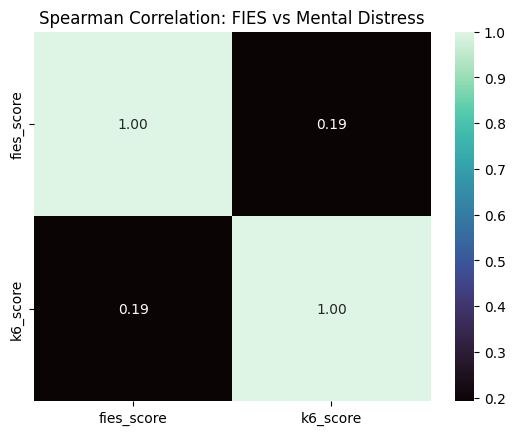

In [228]:

sns.heatmap(
    data[['fies_score','k6_score']].corr(method='spearman'),
    annot=True, cmap='mako', fmt='.2f'
)
plt.title('Spearman Correlation: FIES vs Mental Distress')
plt.show()


In [229]:
#Q2
rho, p = spearmanr(data['resilience_score'], data['k6_score'])
rho, p


(np.float64(-0.331625969508043), np.float64(1.0409369468014457e-27))

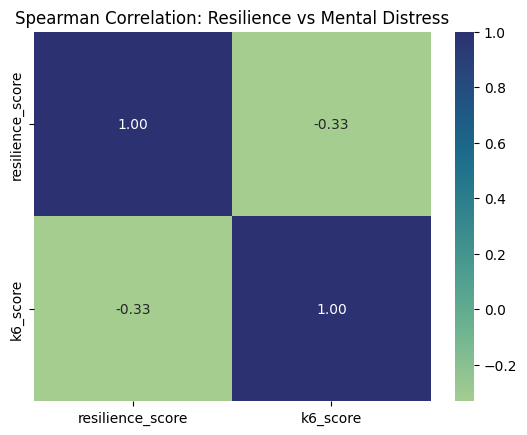

In [230]:
sns.heatmap(
    data[['resilience_score','k6_score']].corr(method='spearman'),
    annot=True, cmap='crest', fmt='.2f'
)
plt.title('Spearman Correlation: Resilience vs Mental Distress')
plt.show()


In [231]:
#Q3
rho, p = spearmanr(data['smm_score'], data['resilience_score'])
rho, p


(np.float64(0.2896058259211565), np.float64(3.0938172274886268e-21))

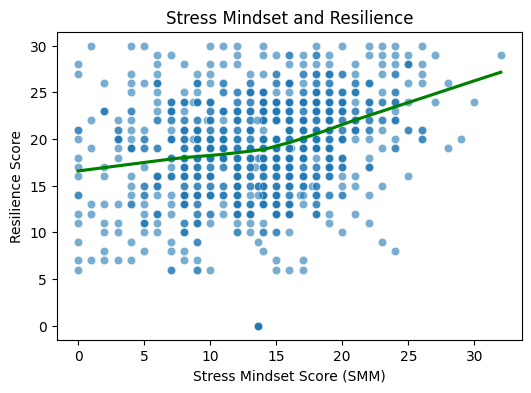

In [232]:

from scipy.stats import spearmanr

plt.figure(figsize=(6,4))

sns.scatterplot(
    x='smm_score',
    y='resilience_score',
    data=data,
    alpha=0.6
)

sns.regplot(
    x='smm_score',
    y='resilience_score',
    data=data,
    scatter=False,
    lowess=True,
    color='green'
)

plt.title('Stress Mindset and Resilience')
plt.xlabel('Stress Mindset Score (SMM)')
plt.ylabel('Resilience Score')
plt.show()


In [233]:
#Q4
#Use Mann–Whitney U test

from scipy.stats import mannwhitneyu


male = data[data['gender'] == 'Male']['k6_score'].dropna()
female = data[data['gender'] == 'Female']['k6_score'].dropna()

u_stat, p_value = mannwhitneyu(male, female, alternative='two-sided')

print(f"Mann–Whitney U statistic = {u_stat:.3f}")
print(f"p-value = {p_value:.5f}")


print(f"Median K6 (Male) = {male.median():.2f}")
print(f"Median K6 (Female) = {female.median():.2f}")


Mann–Whitney U statistic = 95800.000
p-value = 0.12139
Median K6 (Male) = 17.23
Median K6 (Female) = 17.68


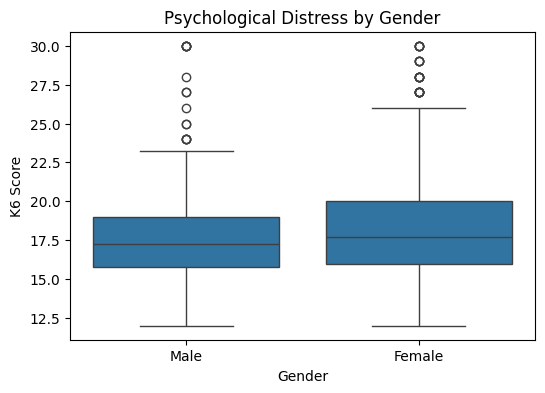

In [234]:

plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='k6_score', data=data)
plt.title('Psychological Distress by Gender')
plt.xlabel('Gender')
plt.ylabel('K6 Score')
plt.show()


In [235]:
#Q5
#Use Kruskal–Wallis
from scipy.stats import kruskal

groups = [
    data[data['region'] == region]['fies_score'].dropna()
    for region in data['region'].dropna().unique()
]

h_stat, p_value = kruskal(*groups)

print(f"Kruskal–Wallis H statistic = {h_stat:.3f}")
print(f"p-value = {p_value:.5f}")


Kruskal–Wallis H statistic = 2.490
p-value = 0.77795


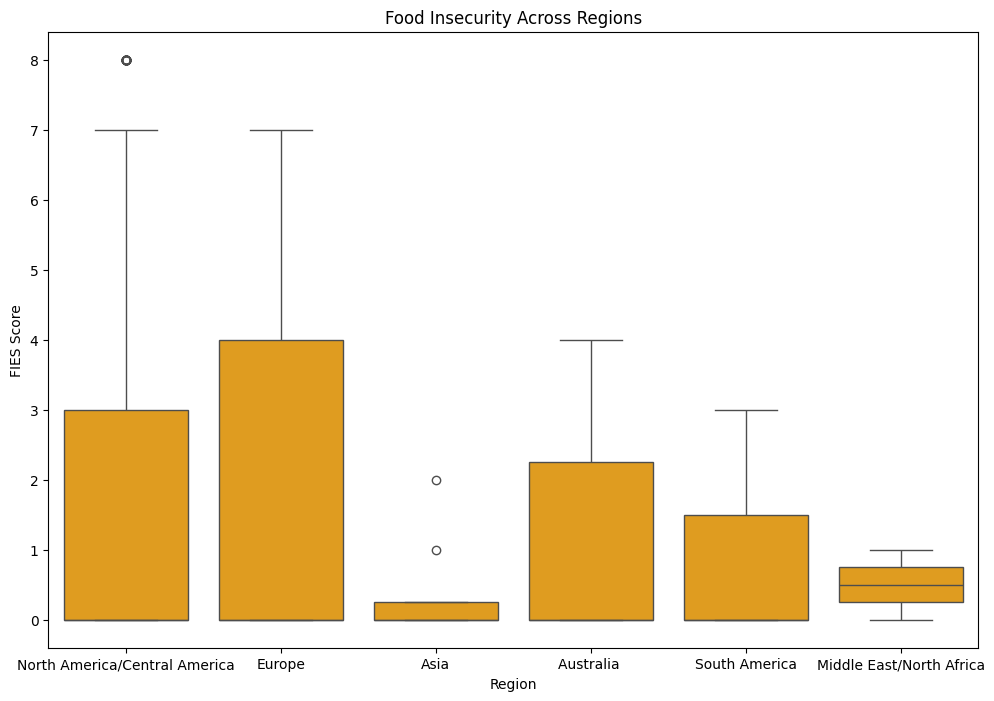

In [236]:


plt.figure(figsize=(12,8))
sns.boxplot(x='region', y='fies_score',color="orange", data=data)
plt.title('Food Insecurity Across Regions')
plt.xlabel('Region')
plt.ylabel('FIES Score')
plt.show()


In [237]:
data.columns

Index(['timestamp', 'gender', 'age', 'enrolled_college', 'region',
       'work_hours_week', 'personal_income', 'household_income',
       'Are you or your family eligible for SNAP benefits or any governmental assistance program?',
       'education_level', 'gpa_range', 'physical_activity_freq',
       'dietary_style', 'food_thoughts_daily', 'fies_q1', 'fies_q2', 'fies_q3',
       'fies_q4', 'fies_q5', 'fies_q6', 'fies_q7', 'fies_q8', 'rs_q1', 'rs_q2',
       'rs_q3', 'rs_q4', 'rs_q5', 'rs_q6', 'smm_q1', 'smm_q2', 'smm_q3',
       'smm_q4', 'smm_q5', 'smm_q6', 'smm_q7', 'smm_q8', 'pss_q1', 'pss_q2',
       'pss_q3', 'pss_q4', 'pss_q5', 'pss_q6', 'pss_q7', 'pss_q8', 'pss_q9',
       'pss_q10', 'k10_q1', 'k10_q2', 'k10_q3', 'k10_q4', 'k10_q5', 'k10_q6',
       'exercise_days_week', 'breakfast_freq', 'whole_grains_freq',
       'dairy_freq', 'caffeine_freq', 'fruits_freq', 'nuts_freq',
       'rice_pasta_freq', 'meat_freq', 'leafy_veg_freq', 'beans_freq',
       'fish_freq', 'fast_food_fr

# Load cleaned_dataset

In [238]:
cols_to_remove = [
    'fies_score','fies_level',
    'resilience_score','RS_level',
    'smm_score','smm_level',
    'k10_score','k10_level','fish_freq','fast_food_freq'
    'multivitamin_freq','fish_oil_freq'
]

cleaned_data = data.drop(columns=[c for c in cols_to_remove if c in data.columns])

cleaned_data.to_csv("cleaned_dataset.csv", index=False)


In [ ]:
from google.colab import files
files.download("cleaned_data.csv")
